In [1]:
from os import listdir
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pygrib
import numpy as np
import xarray as xr
import datetime as dt
cdf_path = '/mnt/c/Users/bpara/uems/runs/1993blizzard/wrfprd'
prep_path = '/mnt/c/Users/bpara/uems/runs/1993blizzard/wpsprd'
grib_path = '/mnt/c/Users/bpara/uems/runs/1993blizzard/grib'
test_nc = '../../../Downloads/vwnd.1844.nc'
nc_path = '../../../Downloads'

In [55]:
def twenty_century_get_by_datetime(nc, datetime, zero_hour = None):
    if zero_hour is None:
        zero_hour = dt.datetime(year = 1800, month = 1, day = 1)
    ONE_HOUR = dt.timedelta(hours = 1)
    time_index = (np.abs(nc['time'] - datetime)).argmin()
    data_variables_list = nc['vwnd'][time_index]
    return data_variables_list

In [89]:
test_data

<xarray.Dataset>
Dimensions:  (level: 28, lat: 181, lon: 360, time: 2928)
Coordinates:
  * level    (level) float32 1e+03 975.0 950.0 925.0 900.0 ... 20.0 10.0 5.0 1.0
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1844-01-01 ... 1844-12-31T21:00:00
Data variables:
    vwnd     (time, level, lat, lon) float32 ...
Attributes: (12/24)
    Conventions:               CF-1.2
    title:                     8x Daily NOAA/CIRES/DOE 20th Century Reanalysi...
    comments:                  Data are from \nNOAA/CIRES/DOE 20th Century Re...
    platform:                  Model
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    license:                   These data are available free of charge under ...
    ...                        ...
    citation1:                 Slivinski, L. C, G. P. Compo, J. S. Whitaker, ...
    References:                https://www.psl.noaa.gov/data/gridded/data.20t...
    creator_name:              NOAA/PSL
    institution:               NOAA Physical Sciences Laboratory & CU/CIRES \...
    contact:                   psl.data@noaa.gov
    citation:                  Compo,G.P. <https://www.psl.noaa.gov/people/gi...

In [96]:
test_2 = xr.DataArray(test_data['vwnd'][10], coords = {'level': test_data['level'], 'lat': test_data['lat'], 'lon': test_data['lon']}, 
                      dims=['level', 'lat', 'lon'])
test_2

<xarray.DataArray 'vwnd' (level: 28, lat: 181, lon: 360)>
array([[[ -2.1280122 ,  -2.1280122 ,  -2.1280122 , ...,  -2.028012  ,
          -2.1280122 ,  -2.1280122 ],
        [ -2.1280122 ,  -2.1280122 ,  -2.228012  , ...,  -2.028012  ,
          -2.1280122 ,  -2.1280122 ],
        [ -2.1280122 ,  -2.1280122 ,  -2.1280122 , ...,  -2.028012  ,
          -2.028012  ,  -2.028012  ],
        ...,
        [ -3.328012  ,  -3.328012  ,  -3.328012  , ...,  -3.328012  ,
          -3.328012  ,  -3.328012  ],
        [ -3.1280122 ,  -3.1280122 ,  -3.1280122 , ...,  -3.1280122 ,
          -3.1280122 ,  -3.1280122 ],
        [ -3.1280122 ,  -3.1280122 ,  -3.1280122 , ...,  -3.1280122 ,
          -3.1280122 ,  -3.1280122 ]],

       [[ -2.1158097 ,  -2.1158097 ,  -2.1158097 , ...,  -2.1158097 ,
          -2.1158097 ,  -2.1158097 ],
        [ -2.1158097 ,  -2.1158097 ,  -2.2158096 , ...,  -2.1158097 ,
          -2.1158097 ,  -2.1158097 ],
        [ -2.1158097 ,  -2.1158097 ,  -2.1158097 , ...,  -2.0158095 ,
          -2.0158095 ,  -2.1158097 ],
...
        [-14.938253  , -14.538254  , -14.138254  , ..., -16.138254  ,
         -15.738254  , -15.338254  ],
        [-14.738254  , -14.338254  , -13.938253  , ..., -15.938253  ,
         -15.538254  , -15.138254  ],
        [-14.538254  , -14.138254  , -13.738254  , ..., -15.738254  ,
         -15.338254  , -14.938253  ]],

       [[  1.4005371 ,   1.3005371 ,   1.2005371 , ...,   1.8005371 ,
           1.7005371 ,   1.6005371 ],
        [  1.4005371 ,   1.3005371 ,   1.2005371 , ...,   1.8005371 ,
           1.7005371 ,   1.5005372 ],
        [  1.4005371 ,   1.3005371 ,   1.1005371 , ...,   1.7005371 ,
           1.7005371 ,   1.5005372 ],
        ...,
        [  1.4005371 ,   1.9005371 ,   2.5005372 , ...,  -0.29946288,
           0.20053712,   0.8005371 ],
        [  2.0005372 ,   2.5005372 ,   3.100537  , ...,   0.3005371 ,
           0.8005371 ,   1.4005371 ],
        [  2.600537  ,   3.2005372 ,   3.800537  , ...,   0.90053713,
           1.5005372 ,   2.100537  ]]], dtype=float32)
Coordinates:
  * level    (level) float32 1e+03 975.0 950.0 925.0 900.0 ... 20.0 10.0 5.0 1.0
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes: (12/14)
    long_name:         3-hourly V-wind on Pressure Levels
    units:             m/s
    GRIB_name:         VGRD
    var_desc:          v-wind
    dataset:           NOAA/CIRES/DOE 20th Century Reanalysis version 3si
    level_desc:        Pressure Levels
    ...                ...
    standard_name:     northward_wind
    valid_range:       [-280.  350.]
    statistic_method:  Ensemble mean is calculated by averaging over all 80 e...
    GridType:          Cylindrical Equidistant Projection Grid
    datum:             wgs84
    actual_range:      [-49.69974   49.244164]

In [57]:
test_data = xr.open_dataset(test_nc)
date = np.datetime64(dt.datetime(year = 1844, month = 4, day = 2, hour = 6))

In [98]:
twenty_century_get_by_datetime(test_data, date)

<xarray.DataArray 'vwnd' (level: 28, lat: 181, lon: 360)>
[1824480 values with dtype=float32]
Coordinates:
  * level    (level) float32 1e+03 975.0 950.0 925.0 900.0 ... 20.0 10.0 5.0 1.0
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    time     datetime64[ns] 1844-04-02T06:00:00
Attributes: (12/14)
    long_name:         3-hourly V-wind on Pressure Levels
    units:             m/s
    GRIB_name:         VGRD
    var_desc:          v-wind
    dataset:           NOAA/CIRES/DOE 20th Century Reanalysis version 3si
    level_desc:        Pressure Levels
    ...                ...
    standard_name:     northward_wind
    valid_range:       [-280.  350.]
    statistic_method:  Ensemble mean is calculated by averaging over all 80 e...
    GridType:          Cylindrical Equidistant Projection Grid
    datum:             wgs84
    actual_range:      [-49.69974   49.244164]

In [107]:
#listdir(grib_path)
'''
    filter_by_keys={'typeOfLevel': 'isobaricInhPa'}
    filter_by_keys={'typeOfLevel': 'heightAboveGround'}
    filter_by_keys={'typeOfLevel': 'tropopause'}
    filter_by_keys={'typeOfLevel': 'maxWind'}
    filter_by_keys={'typeOfLevel': 'meanSea'}
    filter_by_keys={'typeOfLevel': 'surface'}
    filter_by_keys={'typeOfLevel': 'depthBelowLandLayer'}
'''
grb = xr.open_dataset(f'{grib_path}/1993031206.cfsr.t06z.pgrb2f00', engine='cfgrib', 
                      backend_kwargs={'filter_by_keys': {'typeOfLevel': 'depthBelowLandLayer'}})
grb

skipping variable: paramId==3086 shortName='ssw'
Traceback (most recent call last):
  File "/home/bparazin/anaconda3/envs/1844redux/lib/python3.10/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/bparazin/anaconda3/envs/1844redux/lib/python3.10/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='depthBelowLandLayer' value=Variable(dimensions=('depthBelowLandLayer',), data=array([0. , 0.1, 0.4, 1. ])) new_value=Variable(dimensions=(), data=0.0)


<xarray.Dataset>
Dimensions:              (depthBelowLandLayer: 4, latitude: 361, longitude: 720)
Coordinates:
    time                 datetime64[ns] ...
    step                 timedelta64[ns] ...
  * depthBelowLandLayer  (depthBelowLandLayer) float64 0.0 0.1 0.4 1.0
  * latitude             (latitude) float64 90.0 89.5 89.0 ... -89.0 -89.5 -90.0
  * longitude            (longitude) float64 0.0 0.5 1.0 ... 358.5 359.0 359.5
    valid_time           datetime64[ns] ...
Data variables:
    soilw                (depthBelowLandLayer, latitude, longitude) float32 ...
    t                    (depthBelowLandLayer, latitude, longitude) float32 ...
    soill                (depthBelowLandLayer, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2022-10-25T09:14 GRIB to CDM+CF via cfgrib-0.9.1...

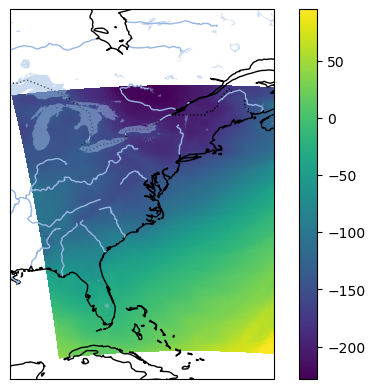

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([-65, -90, 20, 55], crs=ccrs.PlateCarree())
im = ax.pcolor(lon, lat, pert_geo)
plt.colorbar(im)

In [18]:
data = Dataset(f'{cdf_path}/wrfout_d01_1993-03-15_00:00:00', 'r')
pert_geo = data['PH'][0, 3, :]
temp = data['T2'][0, :]
lat = data['XLAT'][0, :]
lon = data['XLONG'][0, :]
#data.close()

In [177]:
np.shape(rain), np.shape(temp)

((107, 99), (107, 99))

In [7]:
data.variables

{'Times': <class 'netCDF4._netCDF4.Variable'>
 |S1 Times(Time, DateStrLen)
 unlimited dimensions: Time
 current shape = (1, 19)
 filling on, default _FillValue of   used,
 'XLAT': <class 'netCDF4._netCDF4.Variable'>
 float32 XLAT(Time, south_north, west_east)
     FieldType: 104
     MemoryOrder: XY 
     description: LATITUDE, SOUTH IS NEGATIVE
     units: degree_north
     stagger: 
     coordinates: XLONG XLAT
 unlimited dimensions: Time
 current shape = (1, 107, 99)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'XLONG': <class 'netCDF4._netCDF4.Variable'>
 float32 XLONG(Time, south_north, west_east)
     FieldType: 104
     MemoryOrder: XY 
     description: LONGITUDE, WEST IS NEGATIVE
     units: degree_east
     stagger: 
     coordinates: XLONG XLAT
 unlimited dimensions: Time
 current shape = (1, 107, 99)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'LU_INDEX': <class 'netCDF4._netCDF4.Variable'>
 float32 LU_INDEX(Time, south_north, west_eas